In [30]:
import pandas as pd
import numpy as np
import pandas_datareader as web 
from datetime import datetime, timedelta
import yfinance as yf
from matplotlib import pyplot as plt
import statistics as stats
%matplotlib inline

# How does Nvidia perform against other tech companies?
## is it still worth investing in 2025 and beyond?

In [58]:
# Import Ticker Data
NVDA = yf.Ticker('NVDA')
QQQ = yf.Ticker('QQQ')


In [59]:
# Import Historical Data
NVDA_hist = NVDA.history(period="5y")
QQQ_hist = QQQ.history(period="5y")

In [33]:

NVDA_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-22 00:00:00-05:00,5.251706,5.298230,5.223095,5.246730,224100000,0.000,0.0
2019-11-25 00:00:00-05:00,5.374856,5.508456,5.361919,5.503480,506476000,0.000,0.0
2019-11-26 00:00:00-05:00,5.485818,5.490545,5.392273,5.398742,385244000,0.000,0.0
2019-11-27 00:00:00-05:00,5.444303,5.478661,5.407206,5.433597,215784000,0.004,0.0
2019-11-29 00:00:00-05:00,5.402723,5.431106,5.372348,5.396250,141556000,0.000,0.0


In [60]:
QQQ_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2019-11-22 00:00:00-05:00,195.990560,196.106885,194.575404,195.631927,17189600,0.0,0.0,0.0
2019-11-25 00:00:00-05:00,196.475206,197.987297,196.446129,197.948532,17752800,0.0,0.0,0.0
2019-11-26 00:00:00-05:00,198.074558,198.578579,197.783768,198.326569,14780600,0.0,0.0,0.0
2019-11-27 00:00:00-05:00,198.840260,199.722318,198.597938,199.712616,16963100,0.0,0.0,0.0
2019-11-29 00:00:00-05:00,199.208614,199.509092,198.704579,198.801514,9854600,0.0,0.0,0.0


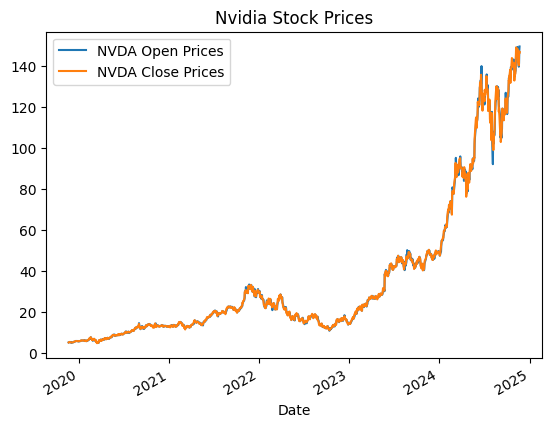

In [34]:
# Compare Open Close High Low
NVDA_hist["Open"].plot(label = 'NVDA Open Prices')
NVDA_hist["Close"].plot(label = 'NVDA Close Prices')
plt.legend()
plt.title("Nvidia Stock Prices")
plt.show()

<Axes: xlabel='Date'>

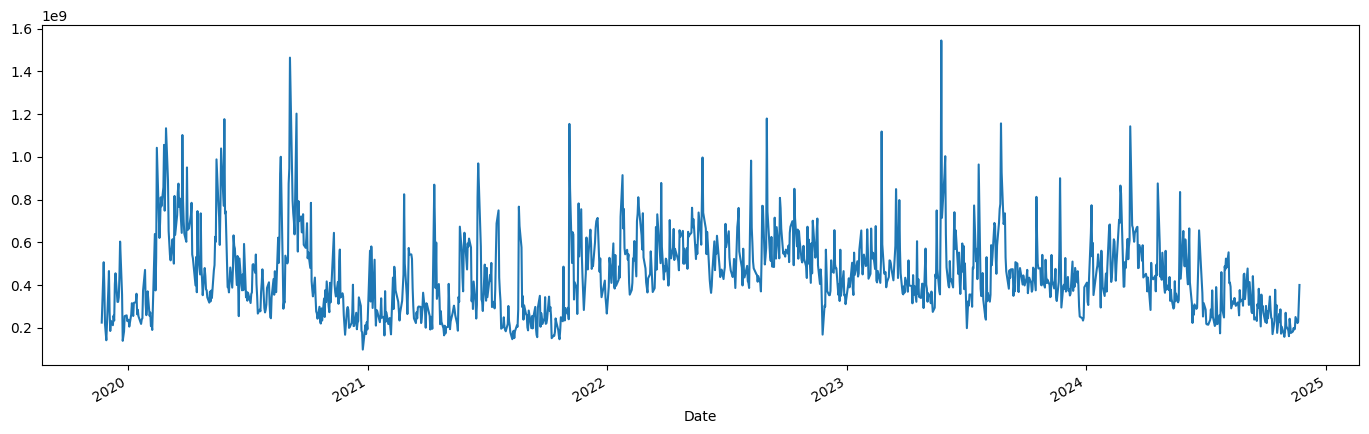

In [35]:
# Volume
NVDA_hist["Volume"].plot(figsize=(17,5))

How Does NVDA compare to the Tech Sector as a whole?

In [36]:
tech = yf.Sector('technology')
tech.top_companies

,name,rating,market weight
symbol,,,
NVDA,NVIDIA Corporation,Buy,0.187251
AAPL,Apple Inc.,Buy,0.179780
MSFT,Microsoft Corporation,Buy,0.159762
AVGO,Broadcom Inc.,Buy,0.039851
ORCL,Oracle Corporation,Buy,0.027753
CRM,"Salesforce, Inc.",Buy,0.016707
CSCO,"Cisco Systems, Inc.",Buy,0.011931
ACN,Accenture plc,Buy,0.011742
AMD,"Advanced Micro Devices, Inc.",Buy,0.011612


Lets Compare it to the other top 2 companys in tech, who hold relatively the same markey weight

In [37]:
AAPL = yf.Ticker('AAPL')
MSFT = yf.Ticker("MSFT")

AAPL_hist = AAPL.history(period="5y")
MSFT_hist = MSFT.history(period="5y")

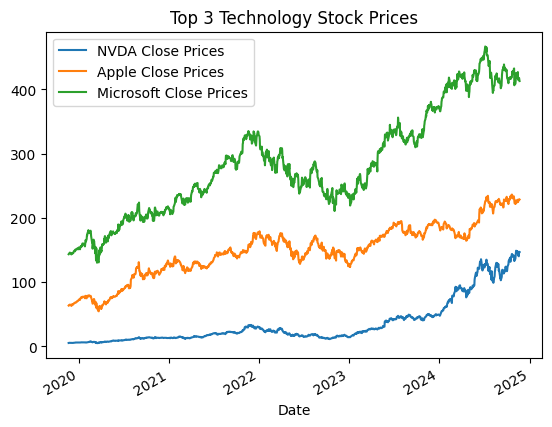

In [38]:
NVDA_hist["Close"].plot(label = 'NVDA Close Prices')
AAPL_hist["Close"].plot(label = 'Apple Close Prices')
MSFT_hist["Close"].plot(label = 'Microsoft Close Prices')
plt.legend()
plt.title("Top 3 Technology Stock Prices")
plt.show()

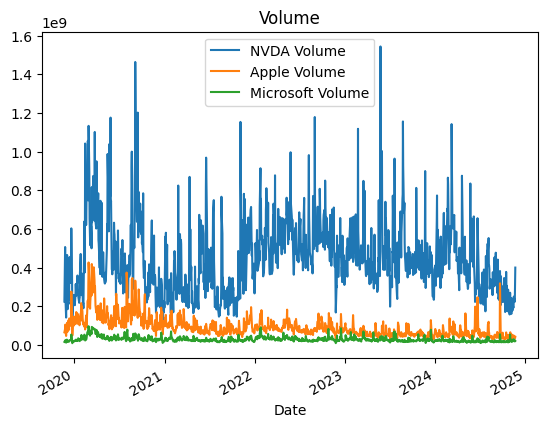

In [39]:
NVDA_hist["Volume"].plot(label = 'NVDA Volume')
AAPL_hist["Volume"].plot(label = 'Apple Volume')
MSFT_hist["Volume"].plot(label = 'Microsoft Volume')
plt.legend()
plt.title("Volume")
plt.show()

Total Money Traded:

In [ ]:
NVDA_hist['Average Price'] = (NVDA_hist['High'] + NVDA_hist['Low'] + NVDA_hist['Close']) / 3
MSFT_hist['Average Price'] = (MSFT_hist['High'] + MSFT_hist['Low'] + MSFT_hist['Close']) / 3
AAPL_hist['Average Price'] = (AAPL_hist['High'] + AAPL_hist['Low'] + AAPL_hist['Close']) / 3

NVDA_hist['Total Traded'] = NVDA_hist['Average Price'] * NVDA_hist['Volume']
MSFT_hist['Total Traded'] = MSFT_hist['Average Price'] * MSFT_hist['Volume']
AAPL_hist['Total Traded'] = AAPL_hist['Average Price'] * AAPL_hist['Volume']

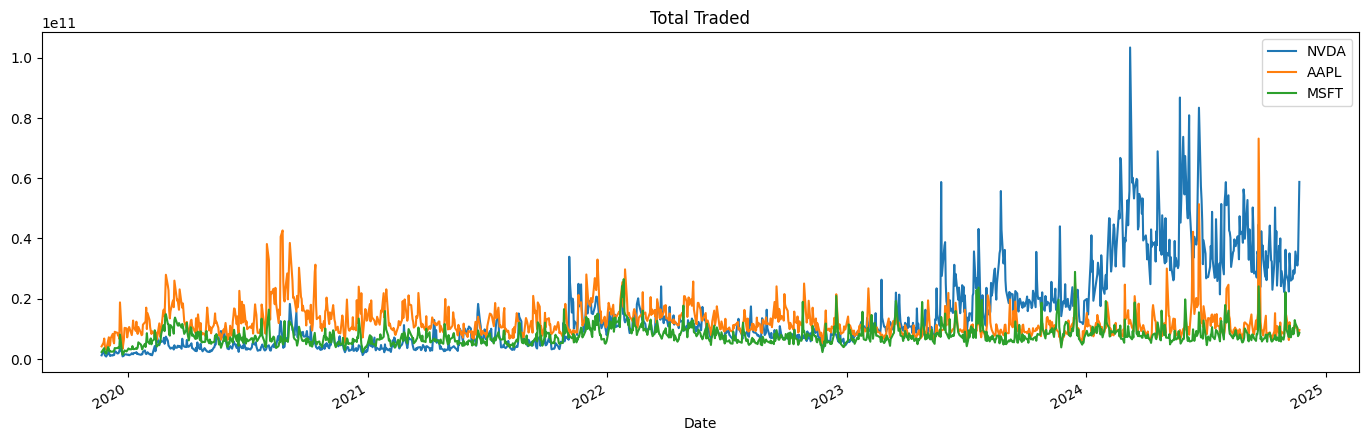

In [41]:
NVDA_hist["Total Traded"].plot(label = 'NVDA',figsize=(17,5))
AAPL_hist["Total Traded"].plot(label = 'AAPL',figsize=(17,5))
MSFT_hist["Total Traded"].plot(label = 'MSFT',figsize=(17,5))
plt.legend()
plt.title("Total Traded")
plt.show()

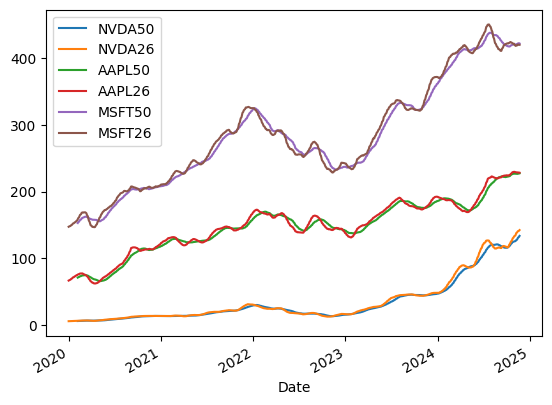

In [42]:

# Plot the MA50 and MA26 of the stocks

NVDA_hist['MA50'] = NVDA_hist['Close'].rolling(50).mean()
AAPL_hist['MA50'] = AAPL_hist['Close'].rolling(50).mean()
MSFT_hist['MA50'] = MSFT_hist['Close'].rolling(50).mean()
NVDA_hist['MA26'] = NVDA_hist['Close'].rolling(26).mean()
AAPL_hist['MA26'] = AAPL_hist['Close'].rolling(26).mean()
MSFT_hist['MA26'] = MSFT_hist['Close'].rolling(26).mean()
NVDA_hist['MA50'].plot(label='NVDA50')
NVDA_hist['MA26'].plot(label='NVDA26')
AAPL_hist['MA50'].plot(label='AAPL50')
AAPL_hist['MA26'].plot(label='AAPL26')
MSFT_hist['MA50'].plot(label='MSFT50')
MSFT_hist['MA26'].plot(label='MSFT26')
plt.legend()

In [43]:
from pandas.plotting import scatter_matrix

In [44]:
tech_comp = pd.concat([NVDA_hist['Close'],AAPL_hist['Close'],MSFT_hist['Close']],axis=1)
tech_comp.columns = ['NVDA Close', 'AAPL Close','MSFT Close']

array([[<Axes: xlabel='NVDA Close', ylabel='NVDA Close'>,
        <Axes: xlabel='AAPL Close', ylabel='NVDA Close'>,
        <Axes: xlabel='MSFT Close', ylabel='NVDA Close'>],
       [<Axes: xlabel='NVDA Close', ylabel='AAPL Close'>,
        <Axes: xlabel='AAPL Close', ylabel='AAPL Close'>,
        <Axes: xlabel='MSFT Close', ylabel='AAPL Close'>],
       [<Axes: xlabel='NVDA Close', ylabel='MSFT Close'>,
        <Axes: xlabel='AAPL Close', ylabel='MSFT Close'>,
        <Axes: xlabel='MSFT Close', ylabel='MSFT Close'>]], dtype=object)

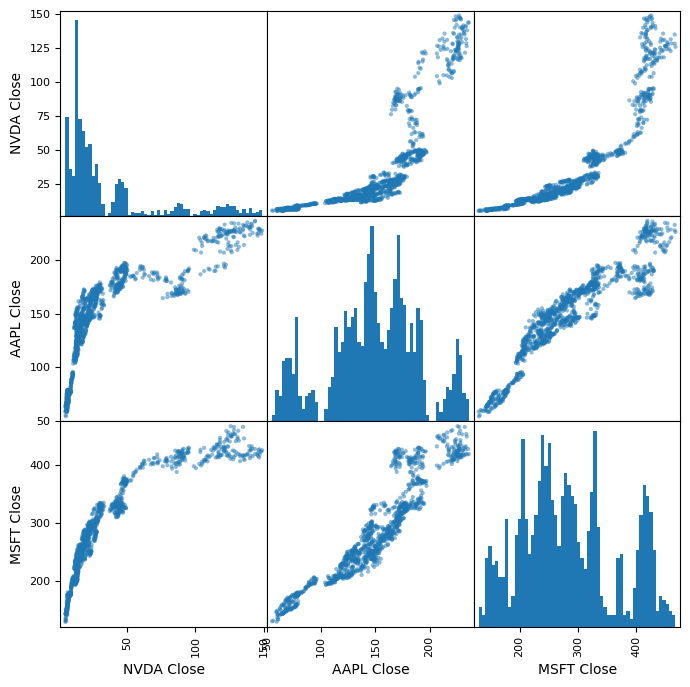

In [45]:
scatter_matrix(tech_comp,figsize=(8,8),hist_kwds={'bins':60})

In [81]:
MSFT_2024 = MSFT.history(start='2024-1-1',end='2024-11-1')
NVDA_2024 = NVDA.history(start='2024-1-1',end='2024-11-1')
AAPL_2024 = AAPL.history(start='2024-1-1',end='2024-11-1')
QQQ_2024 = QQQ.history(start='2024-1-1',end='2024-11-1')
QQQ_2024.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-10-25 00:00:00-04:00,495.140015,500.279999,494.429993,495.320007,38762100,0.0,0.0,0.0
2024-10-28 00:00:00-04:00,498.459991,498.519989,495.100006,495.399994,20477800,0.0,0.0,0.0
2024-10-29 00:00:00-04:00,495.720001,501.350006,493.850006,500.160004,28014100,0.0,0.0,0.0
2024-10-30 00:00:00-04:00,499.390015,500.350006,495.890015,496.380005,29756000,0.0,0.0,0.0
2024-10-31 00:00:00-04:00,492.380005,492.429993,483.750000,483.850006,41245200,0.0,0.0,0.0


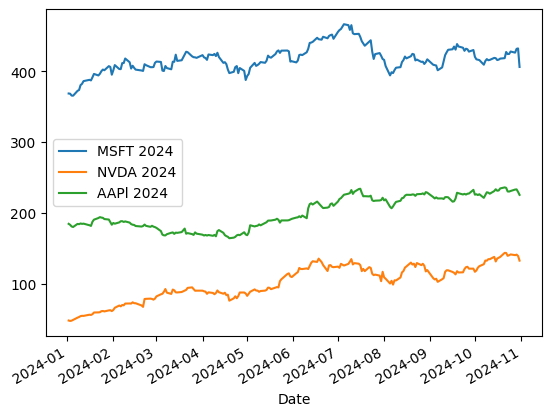

In [71]:
MSFT_2024['Close'].plot(label='MSFT 2024')
NVDA_2024['Close'].plot(label='NVDA 2024')
AAPL_2024['Close'].plot(label='AAPl 2024')
plt.legend()

# Daily Percentage Change:

In [83]:
#Daily Percentage Change in 2024
NVDA_2024['returns'] = (NVDA_2024['Close']/NVDA_2024['Close'].shift(1)) -1
AAPL_2024['returns'] = (AAPL_2024['Close']/AAPL_2024['Close'].shift(1)) -1
MSFT_2024['returns'] = (MSFT_2024['Close']/MSFT_2024['Close'].shift(1)) -1
QQQ_2024['returns'] = (QQQ_2024['Close']/QQQ_2024['Close'].shift(1)) -1
QQQ_2024.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,returns
Date,,,,,,,,,
2024-10-25 00:00:00-04:00,495.140015,500.279999,494.429993,495.320007,38762100,0.0,0.0,0.0,0.006094
2024-10-28 00:00:00-04:00,498.459991,498.519989,495.100006,495.399994,20477800,0.0,0.0,0.0,0.000161
2024-10-29 00:00:00-04:00,495.720001,501.350006,493.850006,500.160004,28014100,0.0,0.0,0.0,0.009608
2024-10-30 00:00:00-04:00,499.390015,500.350006,495.890015,496.380005,29756000,0.0,0.0,0.0,-0.007558
2024-10-31 00:00:00-04:00,492.380005,492.429993,483.750000,483.850006,41245200,0.0,0.0,0.0,-0.025243


In [84]:
NVDA_dpc_mean2024 = NVDA_2024['returns'].mean()
MSFT_dpc_mean2024= MSFT_2024['returns'].mean()
AAPL_dpc_mean2024= AAPL_2024['returns'].mean()
QQQ_dpc_mean2024 = QQQ_2024['returns'].mean()
print(NVDA_dpc_mean2024,"Mean Daily Percentage Change of NVDA in 2024")
print(MSFT_dpc_mean2024,"Mean Daily Percentage Change of MSFT in 2024")
print(AAPL_dpc_mean2024,"Mean Daily Percentage Change of AAPL in 2024")
print(QQQ_dpc_mean2024,"Mean Daily Percentage Change of Nasdaq in 2024")

0.005435368232203055 Mean Daily Percentage Change of NVDA in 2024
0.000541917826471787 Mean Daily Percentage Change of MSFT in 2024
0.0010621788060977853 Mean Daily Percentage Change of AAPL in 2024
0.0009602510051196579 Mean Daily Percentage Change of Nasdaq in 2024


NVDA has a higher average of Daily percentage change in 2024. This could be a sign of high volatility with really high returns. 

In [85]:
NVDA_hist['returns'] = (NVDA_hist['Close']/NVDA_hist['Close'].shift(1)) -1
AAPL_hist['returns'] = (AAPL_hist['Close']/AAPL_hist['Close'].shift(1)) -1
MSFT_hist['returns'] = (MSFT_hist['Close']/MSFT_hist['Close'].shift(1)) -1
QQQ_hist['returns'] = (QQQ_hist['Close']/QQQ_hist['Close'].shift(1)) -1
QQQ_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,returns
Date,,,,,,,,,
2024-01-02 00:00:00-05:00,404.093035,404.341959,398.517135,400.857025,58026900,0.0,0.0,0.0,NaN
2024-01-03 00:00:00-05:00,398.208475,399.273877,396.177278,396.615356,47002800,0.0,0.0,0.0,-0.010582
2024-01-04 00:00:00-05:00,394.733503,397.869938,394.355134,394.574188,39432800,0.0,0.0,0.0,-0.005146
2024-01-05 00:00:00-05:00,394.743448,397.840046,393.638211,395.042145,44867900,0.0,0.0,0.0,0.001186
2024-01-08 00:00:00-05:00,396.276817,403.495608,396.127468,403.206879,42473800,0.0,0.0,0.0,0.020668


In [86]:
NVDA_dpc_mean = NVDA_hist['returns'].mean()
MSFT_dpc_mean= MSFT_hist['returns'].mean()
AAPL_dpc_mean= AAPL_hist['returns'].mean()
QQQ_dpc_mean= QQQ_hist['returns'].mean()
print(NVDA_dpc_mean,"Overall Mean Daily Percentage Change of NVDA")
print(MSFT_dpc_mean,"Overall Mean Daily Percentage Change of MSFT")
print(AAPL_dpc_mean,"Overall Mean Daily Percentage Change of AAPL")
print(QQQ_dpc_mean,"Overall Mean Daily Percentage Change of Nasdaq")

0.0032213731105423964 Overall Mean Daily Percentage Change of NVDA
0.0010254112601256586 Overall Mean Daily Percentage Change of MSFT
0.0012190784269429076 Overall Mean Daily Percentage Change of AAPL
0.0009602510051196579 Overall Mean Daily Percentage Change of Nasdaq


Like 2024, NVDA has a historically higher mean daily percentage return then its tech competitors. We will then plot these returns to see signs of high volatility. 

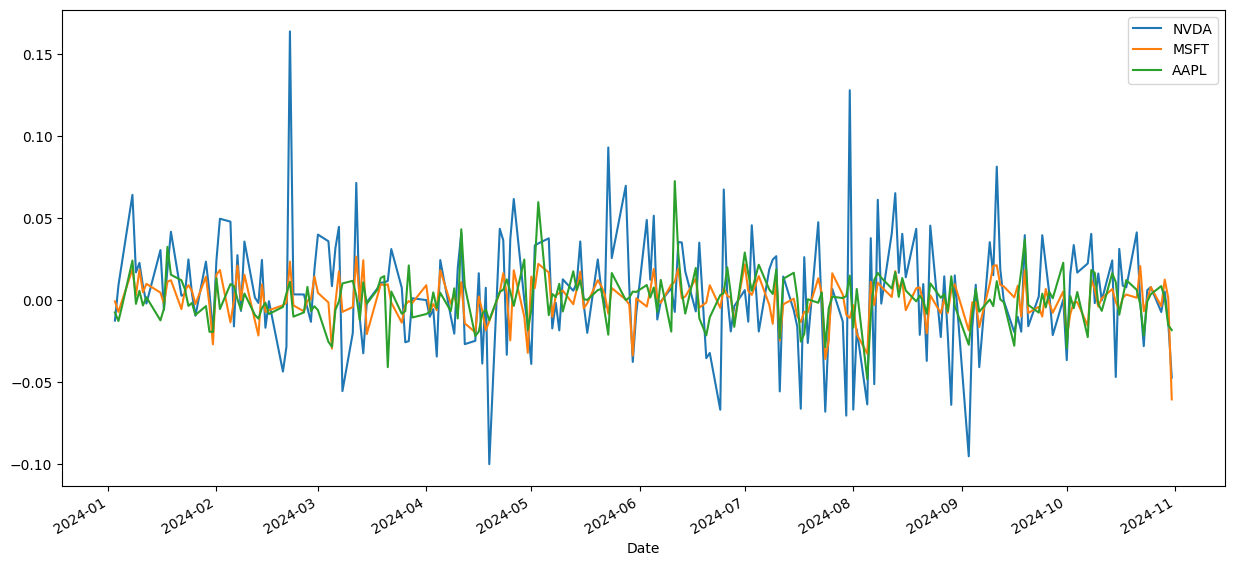

In [76]:
NVDA_2024['returns'].plot(figsize=(15,7),label="NVDA")
MSFT_2024['returns'].plot(figsize=(15,7),label="MSFT")
AAPL_2024['returns'].plot(figsize=(15,7),label="AAPL")
plt.legend()

From the plot above we see signs of high volatility of NVDA in 2024 with large fluctuations percentage returns while MSFT and AAPL have a stable return not going over the +5 -5 Percent benchmark.

## Distribution of Returns:


<Axes: >

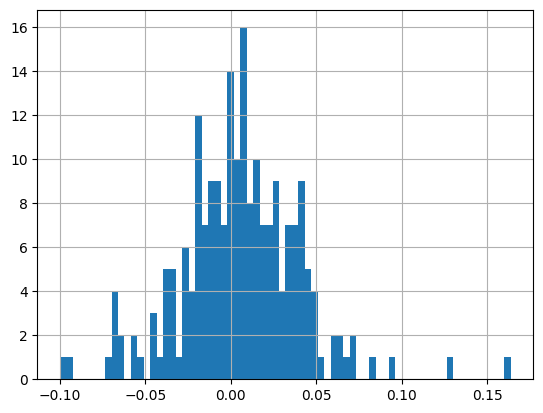

In [53]:
NVDA_2024['returns'].hist(bins=70)

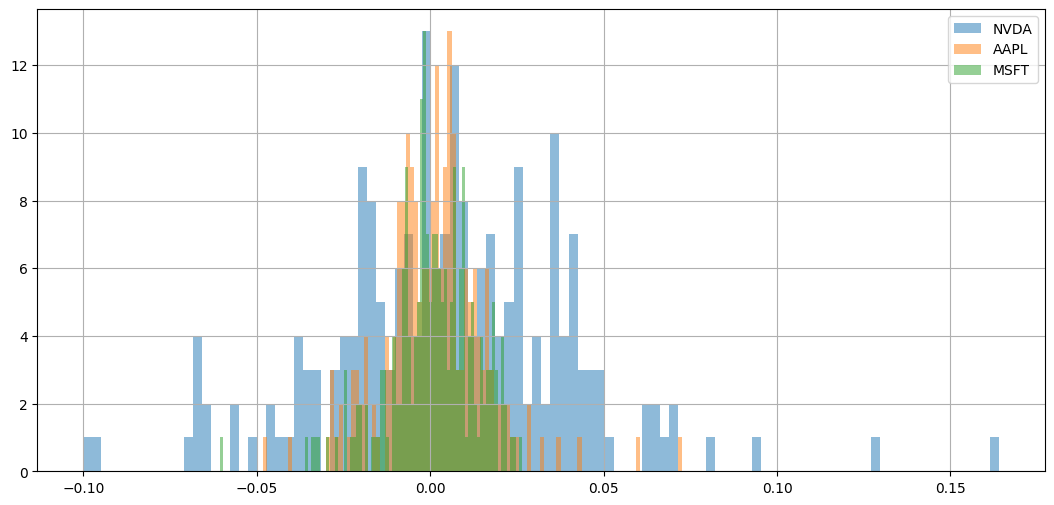

In [54]:
NVDA_2024['returns'].hist(bins=100,label='NVDA',alpha=.5,figsize=(13,6))
AAPL_2024['returns'].hist(bins=100,label='AAPL',alpha=.5)
MSFT_2024['returns'].hist(bins=100,label='MSFT',alpha=.5)
plt.legend()

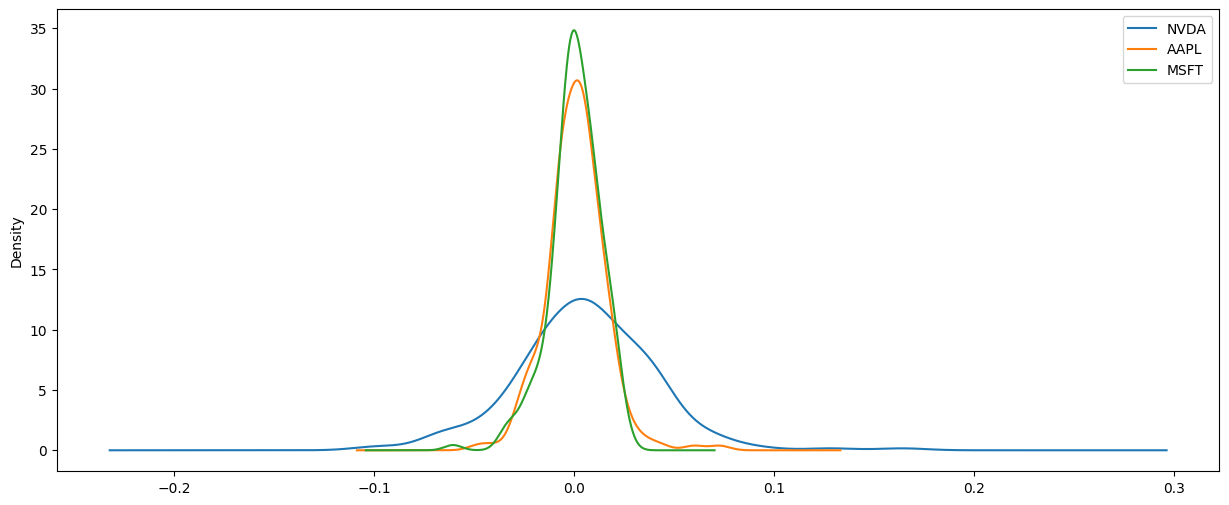

In [55]:
NVDA_2024['returns'].plot(kind='kde',label='NVDA',figsize=(15,6))
AAPL_2024['returns'].plot(kind='kde',label='AAPL')
MSFT_2024['returns'].plot(kind='kde',label='MSFT')
plt.legend()

## Calculate Volatility:

In [87]:
def calculate_volatility(returns,period=252):
    # Annualize by multiplying the daily standard deviation by the square root of the period (usually 252 trading days)
    volatility = returns.std() * np.sqrt(period)
    return volatility

NVDA_returns = NVDA_2024['returns']
MSFT_returns= MSFT_2024['returns']
AAPL_returns= AAPL_2024['returns']
QQQ_returns= QQQ_2024['returns']


NVDA_vol = calculate_volatility(NVDA_returns)
AAPL_vol = calculate_volatility(AAPL_returns)
MSFT_vol = calculate_volatility(MSFT_returns)
QQQ_vol = calculate_volatility(QQQ_returns)
print("2024 NVDA Volatility",NVDA_vol)
print("2024 AAPL Volatility",AAPL_vol)
print("2024 MSFT Volatility",MSFT_vol)
print("2024 Nasdaq Volatility",QQQ_vol)

2024 NVDA Volatility 0.5517058602306875
2024 AAPL Volatility 0.23543438962215624
2024 MSFT Volatility 0.20153485426888773
2024 Nasdaq Volatility 0.17957973306660444


As we suspected NVDA has high volatility compared to its competitors in 2024. Though this could mean higher returns given its exponential growth over the course of the year. This could mean the same results historically could be the same. 

In [88]:
NVDA_returns = NVDA_hist['returns']
MSFT_returns= MSFT_hist['returns']
AAPL_returns= AAPL_hist['returns']
QQQ_returns = QQQ_hist['returns']


NVDA_vol = calculate_volatility(NVDA_returns)
AAPL_vol = calculate_volatility(AAPL_returns)
MSFT_vol = calculate_volatility(MSFT_returns)
QQQ_vol = calculate_volatility(QQQ_returns)
print("NVDA Volatility",NVDA_vol)
print("AAPL Volatility",AAPL_vol)
print(" MSFT Volatility",MSFT_vol)
print(" Nasdaq Volatility",QQQ_vol)

NVDA Volatility 0.5377379769106374
AAPL Volatility 0.3171001391949748
 MSFT Volatility 0.3041576911114534
 Nasdaq Volatility 0.17957973306660444


## Conclusion:
NVDA compared to top tech compaines Microsoft and Apple, has been significantly better even with its high volatility. NVDA should be in majority of peoples porfolios as its historically high returns and its impending growth in 2025 and years after. 